# Pandas

```Pandas``` 패키지는 데이터 분석에 자주 사용되는 dataframe 기반 패키지이다.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

### Pandas dataframe과 numpy array 비교

In [3]:
A = np.array( [[ 1., 2., 3.],
           [4., 5., 6.]])
A

array([[1., 2., 3.],
       [4., 5., 6.]])

Numpy array는 pandas dataframe으로 쉽게 변경할 수 있다.

보통 ```pd.Dataframe```으로 생성하며, 여기서는 ```from pandas import DataFrame```으로도 import하였기에, 그냥 ```DataFrame```으로 생성한다.

행 index와 컬럼으로 표현된다.

In [4]:
A = np.array( [[ 1., 2., 3.],
          [ 4., 5., 6.]] )
AF = DataFrame(A)
AF

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,6.0


In [5]:
AF.columns = ['C1', 'C2', 'C3']
AF.index = ['R1', 'R2']

In [6]:
AF

,C1,C2,C3
R1,1.0,2.0,3.0
R2,4.0,5.0,6.0


### Series

Pandas Dataframe는 Series의 모임이라고 할 수 있다.

Series는 array와 비슷한 데이터 구조이며, index를 보다 자유롭게 설정할 수 있는 점이 다르다.

In [7]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

```dtype: int64```에서 유추할 수 있듯이, 데이터의 타입은 동일해야 하지만, ```object``` 타입으로 비교적 flexible하게 생성할 수 있다.

In [8]:
temp = Series(["a", 1, 1.2])
temp

0      a
1      1
2    1.2
dtype: object

In [9]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [10]:
obj.index 

RangeIndex(start=0, stop=4, step=1)

아래에서는 index를 문자열로 따로 설정하였다.

In [11]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [12]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [13]:
obj2['a']

-5

In [14]:
obj2['d'] = 6
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [15]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

여러가지 연산들이 numpy array와 비슷하게 적용될 수 있다.

In [16]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [17]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [18]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [19]:
obj2.median(), obj2.mean(), obj2.std()

(4.5, 2.75, 5.439056290693573)

In [20]:
obj2.describe()

count    4.000000
mean     2.750000
std      5.439056
min     -5.000000
25%      1.000000
50%      4.500000
75%      6.250000
max      7.000000
dtype: float64

Series는 순서가 정해진 dictionary처럼 생각할 수 있다.  
즉, index가 dictionary의 key 역할을 담당한다.

In [21]:
'b' in obj2

True

In [22]:
'e' in obj2

False

따라서, dictionary로부터 Series를 바로 만드는 것이 가능하다.

In [23]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [24]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [25]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [26]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [27]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

산술 연산을 적용할 수 있다.

In [28]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series와 Series의 index는 ```name```이라는 속성을 지닌다. 

In [29]:
obj4.name = 'population'

In [30]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [31]:
obj4.index.name = 'state'

In [32]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series의 index는 언제는 변경할 수 있다.

In [33]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [34]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## Pandas Dataframe

Pandas Dataframe은 테이블 모양, spreadsheet 형태의 데이터 구조이다.  
각 컬럼 별로 다른 데이터 타입을 가질 수 있으나, 각 컬럼 내에서는 동일한 데이터 타입을 지닌다.  
각 행과 열에 index가 있으며, Series들의 dictionary라고 생각할 수 있다.  

가장 기본적인 Dataframe 생성 방식은 동일한 길이를 가진 리스트로 이루어진 dictionary를 바탕으로 한다.

In [35]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


```columns```과 행 ```index```를 설정할 수 있다.

In [36]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Dictionary 방식이나, attribute을 통해 column을 선택할 수 있는데, 반환값은 Series이다.

In [37]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [38]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [39]:
type(frame2.year)

pandas.core.series.Series

행 또한 ``loc`` 등을 이용하여 선택할 수 있으며, 반환값은 Series이다.

In [40]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

열의 값을 설정하기

In [41]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [42]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Series를 이용하여 열의 값 설정

In [43]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


새로운 열의 생성

In [44]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


열의 삭제는 dictionary와 유사하다.

In [45]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Dictionary내의 dictionary의 데이터도 Dataframe으로 생성된다.

In [46]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [47]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


###  Index object

Index object는 immutable한 object로 행에 대한 metadata 정보를 가진다.

In [48]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [49]:
index[1:]

Index(['b', 'c'], dtype='object')

In [50]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [51]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [52]:
obj2.index is labels

True

In [53]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [54]:
2003 in frame3.index

False

###  주요 기능들

####  Reindex

Reindexing을 통해 새로운 index로 재배열된 새로운 object를 생성할 수 있다.

In [55]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Reindexing 할 때, 해당되는 index가 없는 경우에는 ```NaN```이 설정된다.

In [56]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [57]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

때로는 ```method=ffill``` 옵션을 이용하여, forward fill을 자동으로 하는 것이 편리하다.

In [58]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

다른 예제

In [59]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


행의 reindex

In [60]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


열의 reindex는 ```columns```인자를 명시한다.

In [61]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


####  엔트리 제거

Series에서의 삭제

In [62]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [63]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [64]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

Dataframe에서의 삭제

In [65]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


행 삭제

In [66]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


열 삭제

In [67]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [68]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing

Series의 indexing

In [69]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [70]:
obj['b']

1.0

In [71]:
obj[1]

1.0

In [72]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [73]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [74]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [75]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [76]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [77]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Dataframe의 indexing

(주의할 점은 DataFrame인 ```obj```에 대해 ```obj[i,j]``` 형태의 indexing 문법은 없다.)

In [78]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Dataframe의 column 선택

In [79]:
# 하나의 컬럼을 선택하여 Series로 반환
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [80]:
# 두 개의 컬럼을 선택하여 Dataframe으로 반환
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Dataframe의 행 선택

In [81]:
data[:1]

,one,two,three,four
Ohio,0,1,2,3


In [82]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


filtering을 통한 행 선택

In [83]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Boolean dataframe과 그것을 통한 선택

In [84]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [85]:
data[data < 5] = 0

In [86]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc

```loc``` : 레이블 또는 부울 배열로 행 및 열 그룹에 액세스  
```iloc``` : 정수 위치 기반 인덱싱

In [87]:
# 반환 값은 Series
data.loc['Colorado']

one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [88]:
data.loc[['Utah','Colorado']]

,one,two,three,four
Utah,8,9,10,11
Colorado,0,5,6,7


In [89]:
# 반환 값은 Series
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [90]:
# 행 선택
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [91]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [92]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [93]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [94]:
data.loc[:'Utah', 'two':'two']

,two
Ohio,0
Colorado,5
Utah,9


In [95]:
data.iloc[:3, 3]

Ohio         0
Colorado     7
Utah        11
Name: four, dtype: int32

In [96]:
data.iloc[:, 3]

Ohio         0
Colorado     7
Utah        11
New York    15
Name: four, dtype: int32

In [97]:
data.iloc[:, 3:4]

,four
Ohio,0
Colorado,7
Utah,11
New York,15


In [98]:
data.iloc[:, :3]

,one,two,three
Ohio,0,0,0
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [99]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [100]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [101]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [102]:
ser[:1]

0    0.0
dtype: float64

```loc```은 slice할 때, 마지막 index를 포함한다.

In [103]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [104]:
ser.iloc[:1]

0    0.0
dtype: float64

Dataframe에 대한 indexing을 정리하자면 다음과 같다.

```obj[val]``` :
 * 하나 혹은 여러 개의 컬럼을 선택할 때. 예) ```data['two']```, ```data[['three', 'one']]```
 * Boolean array를 이용한 행 선택 (filtering). 예) ```data[data['three'] > 5]```
 * 행의 slicing. 예) ```data[:2]```
 * Boolean Dataframe을 이용한 선택. 예) ```data[data < 5]```
 
```obj.loc[val]```, ```obj.iloc[val]``` :
 * 하나의 행이나 행들을 선택할 때. 예) ```data.loc['Colorado']```, ```data.loc[['Utah','Colorado']]```, ```data.iloc[2]```
 
```obj.loc[:, val]```, ```obj.iloc[:, val]```
 * 하나 혹은 여러 개의 열을 선택할 때. 예) ```data.loc[:, 'Colorado']```, ```data.iloc[:, :3]```
 
```obj.loc[val1, val2]```, ```obj.iloc[val1, val2]```
 * 행과 열을 모두 선택할 때. 예) ```data.loc['Colorado', 'one']```, ```data.iloc[1, 1]```

### Concatenate

In [105]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [106]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])

In [107]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

In [108]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [109]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


### ```read_csv```

In [110]:
df_pop = pd.read_csv("european_cities.csv")

In [111]:
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,Berlin,Germany,"3,664,088",31-Dec-20
1,2,Madrid,Spain,"3,305,408",01-Jan-21
2,3,Rome,Italy,"2,770,226",01-Jan-21
3,4,Bucharest,Romania,"2,161,347",01-Jul-21
4,5,Paris,France,"2,139,907",01-Jan-22


In [112]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            94 non-null     int64 
 1   City            94 non-null     object
 2   State           94 non-null     object
 3   Population      94 non-null     object
 4   Date of census  94 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.8+ KB


In [113]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [114]:
df_pop.head()

,Rank,City,State,Population,Date of census,NumericPopulation
0,1,Berlin,Germany,"3,664,088",31-Dec-20,3664088
1,2,Madrid,Spain,"3,305,408",01-Jan-21,3305408
2,3,Rome,Italy,"2,770,226",01-Jan-21,2770226
3,4,Bucharest,Romania,"2,161,347",01-Jul-21,2161347
4,5,Paris,France,"2,139,907",01-Jan-22,2139907


In [115]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [116]:
df_pop.dtypes

Rank                  int64
City                 object
State                object
Population           object
Date of census       object
NumericPopulation     int64
dtype: object

In [117]:
df_pop2 = df_pop.set_index("City")

In [118]:
df_pop2 = df_pop2.sort_index()

In [119]:
df_pop2.head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Aarhus,71,Denmark,"352,751",01-Jan-21,352751
Alicante,79,Spain,"337,304",01-Jan-21,337304
Amsterdam,18,Netherlands,"905,234",31-Jan-22,905234
Antwerp,50,Belgium,"528,903",01-Jan-22,528903
Athens,28,Greece,"664,046",30-Jun-11,664046


In [120]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [121]:
df_pop3.head(7)

Rank Population Date of census  NumericPopulation
State          City                                                      
Austria        Vienna      6  1,951,354      01-Apr-22            1951354
Belgium        Antwerp    50    528,903      01-Jan-22             528903
Bulgaria       Plovdiv    75    342,048      31-Dec-20             342048
               Sofia      13  1,307,439      31-Dec-21            1307439
               Varna      77    341,516      31-Dec-20             341516
Croatia        Zagreb     23    769,944      31-Aug-21             769944
Czech Republic Brno       65    379,466      01-Jan-22             379466

In [122]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census,NumericPopulation
City,,,,
Gothenburg,39,"587,549",31-Dec-21,587549
Malmö,72,"351,749",31-Dec-21,351749
Stockholm,16,"978,770",31-Dec-21,978770


In [123]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                        39
Population             587,549
Date of census       31-Dec-21
NumericPopulation       587549
Name: (Sweden, Gothenburg), dtype: object

In [124]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Malmö,72,Sweden,"351,749",31-Dec-21,351749
Gothenburg,39,Sweden,"587,549",31-Dec-21,587549
Stockholm,16,Sweden,"978,770",31-Dec-21,978770
Córdoba,84,Spain,"322,071",01-Jan-21,322071
Alicante,79,Spain,"337,304",01-Jan-21,337304


In [125]:
city_counts = df_pop.State.value_counts()

In [126]:
city_counts.head()

Germany    22
Spain      12
Italy      10
Poland      9
Romania     6
Name: State, dtype: int64

In [127]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop3

NumericPopulation
State    City                                
Germany  Berlin                       3664088
Spain    Madrid                       3305408
Italy    Rome                         2770226
Romania  Bucharest                    2161347
France   Paris                        2139907
...                                       ...
Germany  Karlsruhe                     308436
Romania  Constan?a                     306607
         Gala?i                        304957
Italy    Catania                       300356
Portugal Vila Nova de Gaia             300018

[94 rows x 1 columns]

In [128]:
df_pop4 = df_pop3.groupby(level="State").sum().sort_values("NumericPopulation", ascending=False)
df_pop4 

,NumericPopulation
State,
Germany,16857185
Spain,9932994
Italy,8507068
Poland,5962528
France,4688549
Romania,3810547
Netherlands,2475895
Bulgaria,1991003
Austria,1951354


<IPython.core.display.Javascript object>


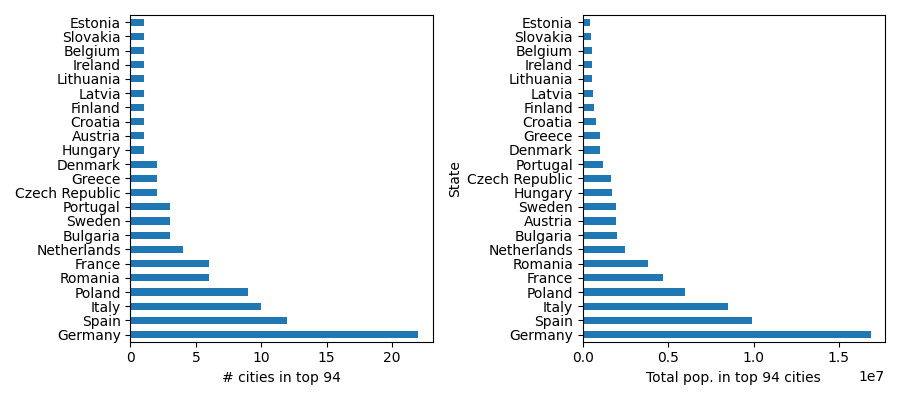

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 94")
df_pop4.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 94 cities")

fig.tight_layout()

## Time series

시계열 자료는 자료 분석에 있어 종종 사용된다.  

```Series```나 ```DataFrame``` object는 시계열 자료를 다루는데 유용하다.

많은 시계열 자료는 고정된 시간 간격을 가지나, 때로는 불규칙한 시간 간격을 가질 때도 있다.

Python 기본 라이브러리인 ```datetime```은 시간과 날짜를 다루는 유용한 도구들을 제공한다.

In [130]:
import datetime

In [131]:
datetime.datetime.now()

datetime.datetime(2022, 8, 29, 15, 20, 19, 204601)

In [132]:
datetime.datetime(2015, 1, 1, 11, 2, 55, 151251)

datetime.datetime(2015, 1, 1, 11, 2, 55, 151251)

In [133]:
datetime.datetime(2022, 10, 1) - datetime.datetime(2012, 3, 4)

datetime.timedelta(days=3863)

In [134]:
stamp = datetime.datetime(2011, 1, 3)

In [135]:
str(stamp)

'2011-01-03 00:00:00'

In [136]:
datetime.datetime.strptime('2016-11-7', '%Y-%m-%d')

datetime.datetime(2016, 11, 7, 0, 0)

```Pandas```에서의 시계열을 다루는 방식은 ```timestamp```로 인덱스된 ```Series```를 다루는 것이라 생각하면 된다.  

시간 index로는 크게 ```DateTimeIndex```와 ```PeriodIndex```가 있다.

Pandas의 ```date_range``` 함수는 날짜나 시간 배열을 생성하기 적합하다. 

```start``` 인자로서 문자열로 된 날짜를 넣을 수 있다.

In [137]:
pd.date_range(start="2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

생성된 객체는 ```DateTimeIndex```이다.

In [138]:
type(pd.date_range("2015-1-1", periods=31))

pandas.core.indexes.datetimes.DatetimeIndex

```DateTimeIndex```의 원소는 ```Timestamp```이다.

In [139]:
pd.date_range(start="2015-1-1", periods=31)[0]

Timestamp('2015-01-01 00:00:00', freq='D')

In [140]:
type(pd.date_range(start="2015-1-1", periods=31)[0])

pandas._libs.tslibs.timestamps.Timestamp

혹은 python 기본 라이브러리인 ```datetime``` object를 이용하여 ```DateTimeIndex```를 만들 수 있다.

In [141]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

```freq``` 인자로 ```"H", "2H", "D", "M"``` 등을 이용할 수 있다. 

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [142]:
pd.date_range(start="2015-1-1 00:00", end="2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

```Series```를 생성하면서 ```index```로 ```DateTimeIndex```를 넣어준다.

In [143]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))

In [144]:
ts1

2015-01-01     0
2015-01-02     1
2015-01-03     2
2015-01-04     3
2015-01-05     4
2015-01-06     5
2015-01-07     6
2015-01-08     7
2015-01-09     8
2015-01-10     9
2015-01-11    10
2015-01-12    11
2015-01-13    12
2015-01-14    13
2015-01-15    14
2015-01-16    15
2015-01-17    16
2015-01-18    17
2015-01-19    18
2015-01-20    19
2015-01-21    20
2015-01-22    21
2015-01-23    22
2015-01-24    23
2015-01-25    24
2015-01-26    25
2015-01-27    26
2015-01-28    27
2015-01-29    28
2015-01-30    29
2015-01-31    30
Freq: D, dtype: int32

In [145]:
ts1["2015-1-3"]

2

In [146]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [147]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [148]:
ts1.index[2].nanosecond

0

In [149]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [150]:
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])
ts2

2015-01-01    0.473032
2015-02-01    0.029025
dtype: float64

```PeriodIndex```를 인덱스로 이용하는 방법. period는 어떤 정해진 기간을 의미한다.  

즉, 아래에서 ```pd.Period('2015-01')```는 2015년 1월 전체 기간을 의미한다. 

반면, 앞에서 했던 ```pd.date_range(start="2015-1-1", periods=31)```에서 ```"2015-1-1"```은 2015년 1월 1일 0:00의 특정 시각을 의미하기 위해 사용되었다.

In [151]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])

In [152]:
type(periods)

pandas.core.indexes.period.PeriodIndex

In [153]:
periods[0]

Period('2015-01', 'M')

In [154]:
type(periods[0])

pandas._libs.tslibs.period.Period

In [155]:
ts3 = pd.Series(np.random.rand(3), periods)
ts3

2015-01    0.307398
2015-02    0.198287
2015-03    0.540531
Freq: M, dtype: float64

In [156]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

```DatetimeIndex```를 인덱스로 가지는 ```Series```나 ```DataFrame```을 ```PeriodIndex```를 인덱스로 가지도록 변경할수 있다.

In [157]:
ts2.to_period('M')

2015-01    0.473032
2015-02    0.029025
Freq: M, dtype: float64

In [158]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]')

### Temperature outdoor example

이 예제는 대략 10분 간격으로 측정한 기온 자료를 이용한다.  
외부의 기온과 내부의 기온을 측정한 자료들이 tsv 파일에 저장되어 있다. 

첫번째 column인 time은 1970년 1월 1일부터 경과한 초이다.

In [159]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [160]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


초로 표현된 time column을 적절한 시간대로 변경하였다. 
UTC는 협정 세계시를 의미한다.

In [161]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

시간을 index로 변경하였다.

In [162]:
df1 = df1.set_index("time")

In [163]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [164]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [165]:
df2 = df2.set_index("time")

In [166]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


데이터의 형태를 그래프로 살펴보자.

<IPython.core.display.Javascript object>


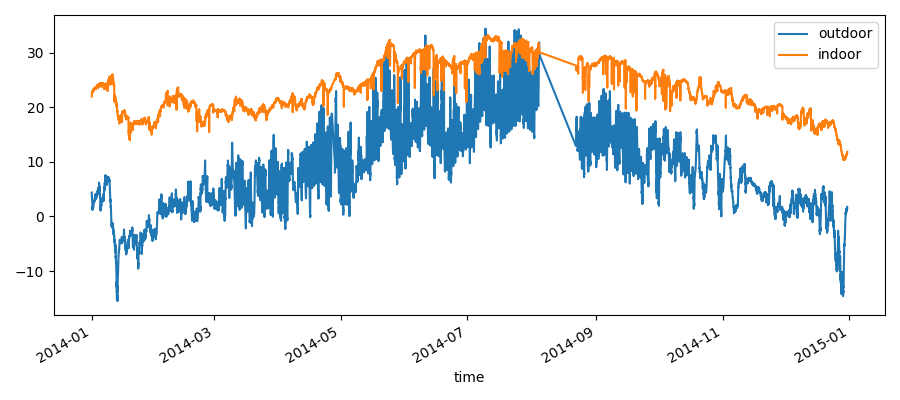

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()

In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


데이터의 일부를 선택하는 작업을 진행해 보자.

In [169]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [170]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [171]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [172]:
df2_jan = df2["2014-1-1":"2014-1-31"]

<IPython.core.display.Javascript object>


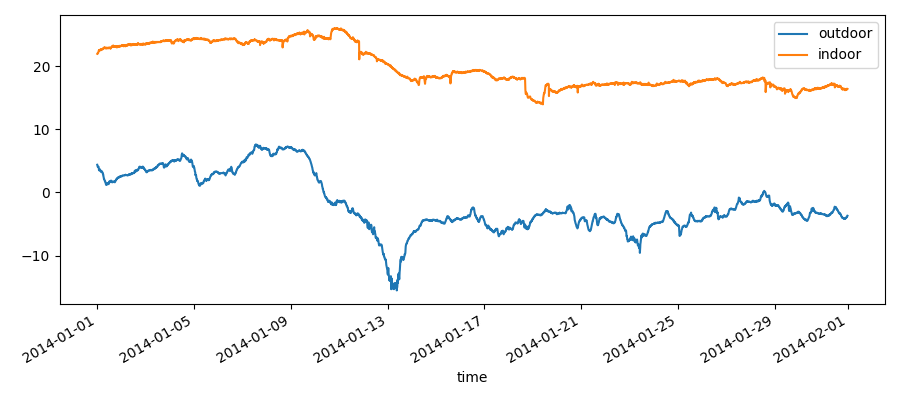

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()

Python 기본 라이브러리의 ```datetime``` 클래스처럼, pandas의 ```Timestamp``` 클래스 또한 년도, 월, 일, 시간, 분, 초 등에 접근할 수 있다.  
다음 예제에서는 월별 평균 기온을 계산해 보자.

먼저 ```reset_index()```를 통해 현재 설정되어 있는 index를 column으로 되돌려 놓겠다.

In [174]:
df1_month = df1.reset_index()
df1_month.head()

,time,outdoor
0,2014-01-01 00:03:06+01:00,4.38
1,2014-01-01 00:13:06+01:00,4.25
2,2014-01-01 00:23:07+01:00,4.19
3,2014-01-01 00:33:07+01:00,4.06
4,2014-01-01 00:43:08+01:00,4.06


새로운 month column을 생성한다.

In [175]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


month별로 평균을 계산한다.

In [176]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df1_month 

,outdoor
month,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [177]:
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)
df2_month

,indoor
month,
1,19.862590
2,20.231507
3,19.597748
4,22.149754
5,26.332160
6,28.687491
7,30.605333
8,28.099068
9,26.950366


Join을 통해 두 데이터프레임을 연결한다. month를 기준으로 합친다.

In [178]:
df_month = df1_month.join(df2_month)
df_month

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748
4,8.105193,22.149754
5,12.261396,26.332160
6,15.586955,28.687491
7,20.780314,30.605333
8,16.494823,28.099068
9,12.823905,26.950366


혹은 위의 일련의 작업을 다음의 코드를 통해 한번에 해결할 수 있다.

In [179]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)
df_month

C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


<IPython.core.display.Javascript object>


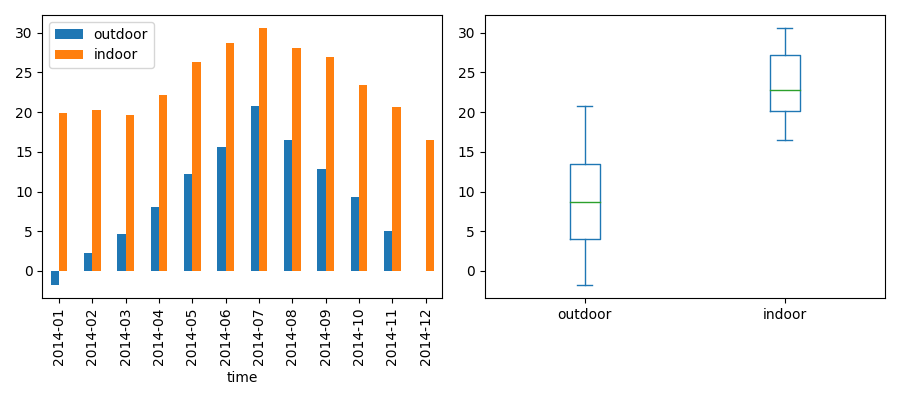

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()

#### Resampling

Pandas의 유용한 기능 중 하나는 시계열을 up-sample 혹은 down-sample할 수 있다는 것이다.  
Up-sample을 위해서는 데이터를 채워넣는 방법을 명시하고,
down-sample을 위해서는 데이터를 aggregate하는 방법을 명시한다.  

먼저 평균을 취함으로써 down-sample을 하는 경우이다.

In [181]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_hour.head()

,outdoor (hourly avg.)
time,
2014-01-01 00:00:00+01:00,4.166667
2014-01-01 01:00:00+01:00,3.851667
2014-01-01 02:00:00+01:00,3.610000
2014-01-01 03:00:00+01:00,3.376667
2014-01-01 04:00:00+01:00,3.303333


In [182]:
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]

In [183]:
df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]

In [184]:
df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]

In [185]:
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

<IPython.core.display.Javascript object>


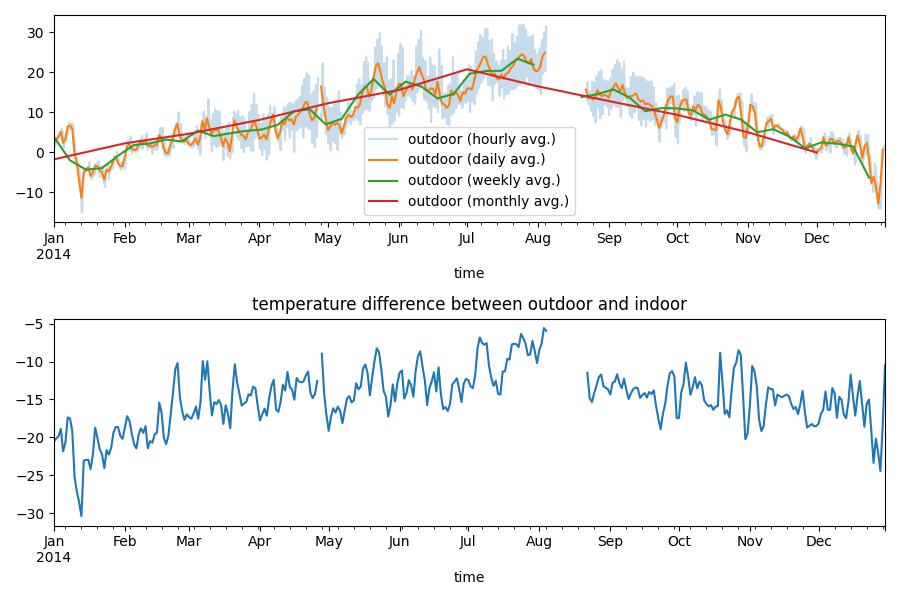

In [186]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()

아래에서는 ```ffill``` (forward-fill), ```bfill``` (back-fill)을 이용한 up-sample 과정을 보여준다. 

원 데이터가 10분 간격이었으며, 부족한 시점의 데이터는 ```ffill```과 ```bfill```의 경우 자동으로 채워진다.

In [187]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


#### Selected day

In [188]:
df1_dec25 = df1.loc["2014-12-25"]
df1_dec25.head(5)

,outdoor
time,
2014-12-25 00:01:45+01:00,-4.88
2014-12-25 00:11:45+01:00,-4.94
2014-12-25 00:21:46+01:00,-5.06
2014-12-25 00:31:47+01:00,-5.06
2014-12-25 00:41:47+01:00,-5.12


In [189]:
df2_dec25 = df2.loc["2014-12-25"]
df2_dec25.head(5)
df1_dec25.describe().T

,count,mean,std,min,25%,50%,75%,max
outdoor,144.0,-7.788819,1.456085,-10.06,-9.075,-7.75,-6.8625,-4.88


<IPython.core.display.Javascript object>


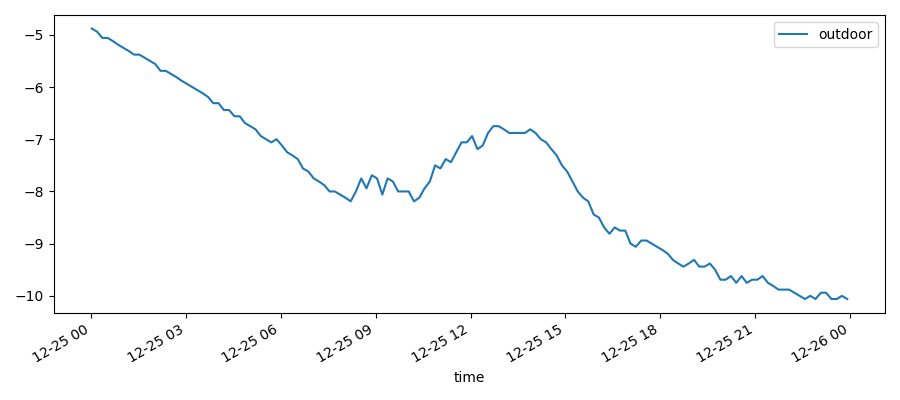

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

df1_dec25.plot(ax=ax)

fig.tight_layout()

In [191]:
df1.index

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00',
               '2014-01-01 00:43:08+01:00', '2014-01-01 00:53:08+01:00',
               '2014-01-01 01:03:09+01:00', '2014-01-01 01:13:09+01:00',
               '2014-01-01 01:23:10+01:00', '2014-01-01 01:33:26+01:00',
               ...
               '2014-12-30 22:26:30+01:00', '2014-12-30 22:36:31+01:00',
               '2014-12-30 22:46:31+01:00', '2014-12-30 22:56:32+01:00',
               '2014-12-30 23:06:32+01:00', '2014-12-30 23:16:33+01:00',
               '2014-12-30 23:26:33+01:00', '2014-12-30 23:36:34+01:00',
               '2014-12-30 23:46:35+01:00', '2014-12-30 23:56:35+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', length=49548, freq=None)